# Monte Carlo Simulation for Stock Portfolio

## Introduction
This notebook performs a Monte Carlo simulation to project the future value of a stock portfolio. It allows you to input your portfolio's stocks, individual risk profiles, expected returns, and other financial characteristics.

## Importing Necessary Libraries
First, we need to import the libraries required for data manipulation, mathematical computations, and visualization.
- `numpy` and `pandas` are used for numerical operations and data handling.
- `matplotlib` is used for plotting graphs.
- `yfinance` is a library to fetch historical stock data.
- `scipy.stats` provides statistical functions, including the normal distribution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

## User Inputs
We will collect inputs for the stocks in the portfolio, the number of simulations, the time horizon, and other parameters.


In [2]:
# List of stock tickers in the portfolio
stocks = ['AAPL', 'MSFT', 'GOOGL']  # You can modify this list

# Investment weights for each stock
weights = np.array([0.4, 0.35, 0.25])  # Sum should be 1

# Initial investment amount
initial_investment = 100000  # For example, $100,000

# Number of simulation runs
num_simulations = 10000

# Time horizon in days
time_horizon = 252  # Typically 252 trading days in a year

# Confidence interval for VaR and CVaR
confidence_level = 0.95

## Fetching Historical Stock Data
We will retrieve historical price data for the stocks in the portfolio using `yfinance`.


In [3]:
# Fetch adjusted closing prices for the stocks
data = yf.download(stocks, period='5y')['Adj Close']

# Display the first few rows of the data
data.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,GOOGL,MSFT
Date,,,
2019-10-22 00:00:00+00:00,58.048965,61.906712,130.253784
2019-10-23 00:00:00+00:00,58.827915,62.726181,131.084793
2019-10-24 00:00:00+00:00,58.924690,62.799999,133.663635
2019-10-25 00:00:00+00:00,59.650417,63.058857,134.418259
2019-10-28 00:00:00+00:00,60.247932,64.289803,137.723068


## Calculating Daily Returns
Compute the daily returns for each stock.

In [4]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Display the first few rows of returns
returns.head()

Ticker,AAPL,GOOGL,MSFT
Date,,,
2019-10-23 00:00:00+00:00,0.013419,0.013237,0.006380
2019-10-24 00:00:00+00:00,0.001645,0.001177,0.019673
2019-10-25 00:00:00+00:00,0.012316,0.004122,0.005646
2019-10-28 00:00:00+00:00,0.010017,0.019521,0.024586
2019-10-29 00:00:00+00:00,-0.023128,-0.021971,-0.009432


## Calculating Portfolio Metrics
Compute the mean returns and the covariance matrix.

In [5]:
# Calculate mean daily returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

## Running the Monte Carlo Simulation
We will simulate the portfolio's future value over the specified time horizon.
- `np.random.multivariate_normal` generates random samples from a multivariate normal distribution.
- `np.cumprod` computes the cumulative product to simulate the portfolio growth over time.
- We multiply the daily returns by the weights to account for the portfolio allocation.

In [6]:
# Array to store simulation results
simulation_results = np.zeros((num_simulations, time_horizon))

# Run simulations
for i in range(num_simulations):
    # Generate random daily returns
    daily_returns = np.random.multivariate_normal(mean_returns, cov_matrix, time_horizon)
    # Calculate cumulative returns
    cumulative_returns = np.cumprod(1 + daily_returns @ weights) * initial_investment
    # Store the results
    simulation_results[i, :] = cumulative_returns

## Visualizing the Simulation Results
Plot the simulation outcomes to visualize the potential future values of the portfolio.

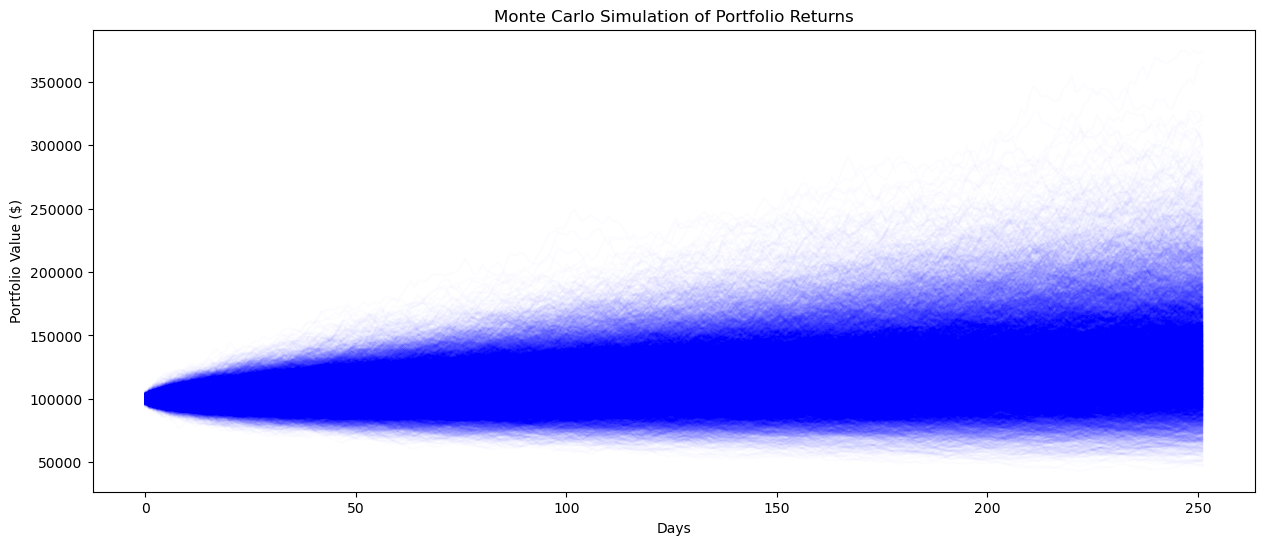

In [7]:
# Plotting the simulation results
plt.figure(figsize=(15, 6))
plt.plot(simulation_results.T, color='blue', alpha=0.01) #alpha=0.01 sets the transparency to make the plot more readable.
plt.title('Monte Carlo Simulation of Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Portfolio Value ($)')
plt.show()

## Analyzing the Simulation Results
Calculate the; 
- **expected portfolio value**
- **Value at Risk (VaR)**
- **Conditional Value at Risk (CVaR)** OR **Expected Shortfall (ES)**


In [8]:
# Calculate the final portfolio values
final_portfolio_values = simulation_results[:, -1]

# Calculate statistics
mean_final_value = np.mean(final_portfolio_values)
median_final_value = np.median(final_portfolio_values)
std_final_value = np.std(final_portfolio_values)

# Calculate VaR
percentile = np.percentile(final_portfolio_values, (1 - confidence_level) * 100)
VaR = initial_investment - percentile

# Calculate CVaR
CVaR = initial_investment - final_portfolio_values[final_portfolio_values <= percentile].mean()


- mean_final_value: The average ending portfolio value across all simulations.
- VaR: The maximum expected loss at the specified confidence level.
- CVaR: The average loss exceeding the VaR, providing insight into tail risk

## Displaying the Results
Present the calculated statistics.


In [9]:
print(f"Mean Final Portfolio Value: ${mean_final_value:,.2f}")
print(f"Median Final Portfolio Value: ${median_final_value:,.2f}")
print(f"Standard Deviation: ${std_final_value:,.2f}")
print(f"{confidence_level * 100}% VaR: ${VaR:,.2f}")
print(f"{confidence_level * 100}% CVaR: ${CVaR:,.2f}")

Mean Final Portfolio Value: $133,574.93
Median Final Portfolio Value: $128,297.12
Standard Deviation: $38,710.53
95.0% VaR: $19,206.55
95.0% CVaR: $28,298.36


## Enhancements for Production-Level Code
To make this code production-ready, consider the following enhancements:

- **Error Handling**: Add try-except blocks to handle exceptions, such as network errors when fetching data.
- **Input Validation**: Validate user inputs to ensure they are in the correct format and within acceptable ranges.
- **Logging**: Implement logging to keep track of the program's execution flow and errors.
- **Modularization**: Break the code into functions or classes to improve readability and maintainability.
- **Configuration File**: Use a configuration file (e.g., JSON or YAML) to manage inputs and parameters externally.
- **Performance Optimization**: Optimize the simulation loop for better performance, possibly using vectorization or parallel processing.


## Potential Next Steps

To further enhance this analysis:

- **Incorporate Dividend Yields**: Include dividend yields for a more accurate total return calculation.
- **Risk-Free Rate**: Factor in the risk-free rate to calculate metrics like the Sharpe ratio.
- **Custom Distributions**: Use distributions other than the normal distribution if you believe the returns are not normally distributed.
- **Economic Indicators**: Integrate economic indicators or market sentiments to adjust your simulation parameters dynamically.
